/home/recoilme/.local/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/recoilme/.local/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
Keyword arguments {'trust_remote_code': True} are not expected by WaifuPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

WaifuPipeline {
  "_class_name": "WaifuPipeline",
  "_diffusers_version": "0.32.0.dev0",
  "_name_or_path": "AiArtLab/waifu-2b",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "XLMRobertaModel"
  ],
  "tokenizer": [
    "transformers",
    "XLMRobertaTokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "SanaTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



  0%|          | 0/20 [00:00<?, ?it/s]

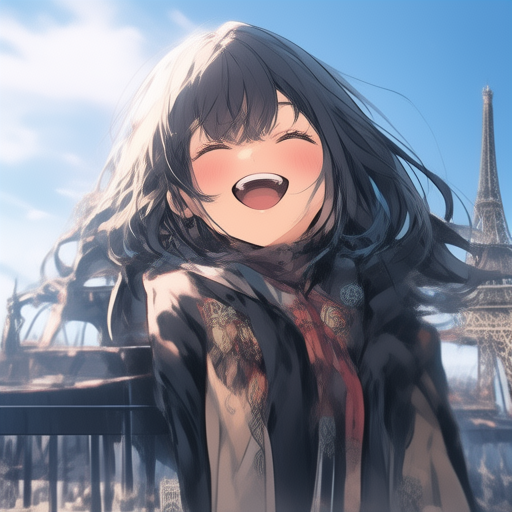

In [1]:
import torch
from diffusers import DiffusionPipeline

from transformers import XLMRobertaTokenizerFast,XLMRobertaModel
from diffusers import FlowMatchEulerDiscreteScheduler
from diffusers.models import AutoencoderKL
from diffusers import SanaTransformer2DModel

pipe_id = "AiArtLab/waifu-2b"
variant = "fp16"
# tokenizer
tokenizer = XLMRobertaTokenizerFast.from_pretrained(
    pipe_id,
    subfolder="tokenizer"
)

# text_encoder
text_encoder = XLMRobertaModel.from_pretrained(
    pipe_id,
    variant=variant,
    subfolder="text_encoder",
    add_pooling_layer=False
).to("cuda")

# scheduler
scheduler = FlowMatchEulerDiscreteScheduler(shift=1.0)

# VAE
vae = AutoencoderKL.from_pretrained(
    pipe_id,
    variant=variant,
    subfolder="vae"
).to("cuda")

# Transformer
transformer = SanaTransformer2DModel.from_pretrained(
    pipe_id,
    variant=variant,
    subfolder="transformer"
).to("cuda")

# Pipeline
pipeline = DiffusionPipeline.from_pretrained(
    pipe_id,
    tokenizer=tokenizer,
    text_encoder=text_encoder,
    vae=vae,
    transformer=transformer,
    trust_remote_code=True,
).to("cuda")
print(pipeline)

prompt = 'аниме девушка, waifu, يبتسم جنسيا , sur le fond de la tour Eiffel'
generator = torch.Generator(device="cuda").manual_seed(42)

image = pipeline(
    prompt = prompt,
    negative_prompt = "",
    generator=generator,
)[0]

for img in image:
    img.show()
    img.save('waifu.png')
